# Importing libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
import tensorflow

In [145]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout

In [102]:
from keras.layers import Conv2D

In [103]:
from keras.layers import MaxPooling2D

In [104]:
from keras.layers import Flatten

In [105]:
from keras.layers import Dense

In [106]:
model=Sequential()

In [107]:
model.add(Conv2D(32,(3,3),input_shape=(64, 64, 3),activation='relu'))

In [108]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [109]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [110]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [111]:
model.add(Flatten())

In [112]:
model.add(Dropout(0.5))

In [113]:
model.add(Dense(units=50,activation='relu'))

In [114]:
model.add(Dense(units=1,activation='sigmoid'))

In [115]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [116]:
from keras.preprocessing.image import ImageDataGenerator

In [117]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [118]:
training_set=train_datagen.flow_from_directory('Dataset/train',target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 1313 images belonging to 2 classes.


In [119]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [120]:
test_set=test_datagen.flow_from_directory(
    'Dataset/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 194 images belonging to 2 classes.


In [122]:
history=model.fit(training_set,epochs=5,
                   validation_data=test_set)

Epoch 1/5
42/42 [==============================] - 10s 225ms/step - loss: 0.1094 - accuracy: 0.9596 - val_loss: 0.1191 - val_accuracy: 0.9588
Epoch 2/5
42/42 [==============================] - 10s 233ms/step - loss: 0.1013 - accuracy: 0.9657 - val_loss: 0.0884 - val_accuracy: 0.9691
Epoch 3/5
42/42 [==============================] - 10s 237ms/step - loss: 0.0922 - accuracy: 0.9650 - val_loss: 0.0890 - val_accuracy: 0.9691
Epoch 4/5
42/42 [==============================] - 11s 254ms/step - loss: 0.1005 - accuracy: 0.9619 - val_loss: 0.1057 - val_accuracy: 0.9639
Epoch 5/5
42/42 [==============================] - 10s 234ms/step - loss: 0.0854 - accuracy: 0.9703 - val_loss: 0.0777 - val_accuracy: 0.9691


In [123]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [127]:
from keras.preprocessing import image

In [147]:
test_image1=image.load_img('Dataset/test/with_mask/1-with-mask.jpg',target_size=(64,64))

In [148]:
test_image2=image.load_img('Dataset/test/without_mask/10.jpg',target_size=(64,64))

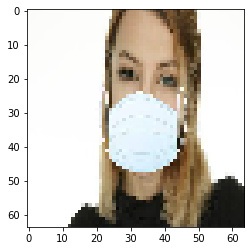

In [149]:
plt.imshow(test_image1)

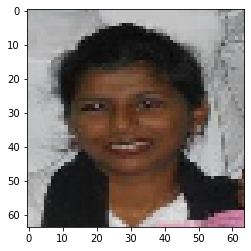

In [150]:
plt.imshow(test_image2)

In [152]:
image1=image.img_to_array(test_image1)

In [153]:
image1.shape

(64, 64, 3)

In [154]:
image1=np.expand_dims(image1,axis=0)

In [155]:
image1.shape

(1, 64, 64, 3)

In [136]:
model.predict(image1)

array([[0.]], dtype=float32)

In [137]:
image2=image.img_to_array(test_image2)

In [138]:
image2=np.expand_dims(image2,axis=0)

In [139]:
model.predict(image2)

array([[1.]], dtype=float32)

In [146]:
model.save('face_model')

INFO:tensorflow:Assets written to: face_model/assets
